In [5]:
import OmicsUtils.DimRedMappers.clusterer
import OmicsUtils.DimRedMappers.umap_embedders
import pandas as pd 
import numpy as np
from sklearn.preprocessing import FunctionTransformer

## Data Preprocessing

In [3]:
fpkm_unstr_df_with_labels = pd.read_csv('./Transcriptomics/data/processed_data/fpkm_unstr_data_with_labels.csv')
gene_cols = fpkm_unstr_df_with_labels.columns.to_numpy()[:60660]
exposure_tsv = pd.read_csv('./Transcriptomics/data/clinical.cart.2023-10-29/exposure.tsv', sep='\t')
ge_kidney_cancer_data_with_tgca_labels = pd.merge(fpkm_unstr_df_with_labels,
                                                  exposure_tsv[['case_submitter_id', 'project_id']],
                                                  left_on='Case ID',
                                                  right_on='case_submitter_id')


In [4]:
ge_kidney_cancer_data_correct_labels = (ge_kidney_cancer_data_with_tgca_labels[ge_kidney_cancer_data_with_tgca_labels['project_id']
                                                                               .isin(
    ['TCGA-KIRC', 'TCGA-KICH', 'TCGA-KIRP']
)]
)

In [6]:
transformer = FunctionTransformer(np.log10)
ge_kidney_cancer_data_correct_labels[gene_cols] = ge_kidney_cancer_data_correct_labels[gene_cols] + 1
ge_kidney_cancer_data_correct_labels[gene_cols] = transformer.fit_transform(ge_kidney_cancer_data_correct_labels[gene_cols])

/var/folders/ng/bwk7d4ds7wz95l011dbvtc9r0000gn/T/ipykernel_56520/19597005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ge_kidney_cancer_data_correct_labels[gene_cols] = ge_kidney_cancer_data_correct_labels[gene_cols] + 1
/var/folders/ng/bwk7d4ds7wz95l011dbvtc9r0000gn/T/ipykernel_56520/19597005.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ge_kidney_cancer_data_correct_labels[gene_cols] = transformer.fit_transform(ge_kidney_cancer_data_correct_labels[gene_cols])


## Run bayesian optimizer on training data 

In [94]:
from importlib import reload
reload(OmicsUtils.DimRedMappers.clusterer)

<module 'OmicsUtils.DimRedMappers.clusterer' from '/Users/abhilashdhal/Projects/OmicsUtils/DimRedMappers/clusterer.py'>

In [95]:
clustering_optimizer = OmicsUtils.DimRedMappers.clusterer.ClusteringOptimizer(data=ge_kidney_cancer_data_correct_labels[gene_cols],
                                                                              )

In [43]:
ge_kidney_cancer_data_correct_labels[gene_cols].to_numpy()

array([[9.35477035e-01, 1.23067244e-01, 1.36078458e+00, ...,
        0.00000000e+00, 1.13589537e-02, 1.29818744e-01],
       [1.18591878e+00, 1.22465200e-02, 1.41848193e+00, ...,
        0.00000000e+00, 9.54398406e-04, 1.58332332e-01],
       [1.22948986e+00, 4.95363922e-01, 1.27373027e+00, ...,
        0.00000000e+00, 3.50361474e-03, 1.58625081e-02],
       ...,
       [1.15416521e+00, 4.16457433e-01, 1.25601981e+00, ...,
        0.00000000e+00, 3.93420617e-03, 3.61096671e-02],
       [9.14723857e-01, 5.86157970e-02, 1.51866263e+00, ...,
        0.00000000e+00, 7.15010537e-03, 3.39411687e-01],
       [1.32102645e+00, 8.96578816e-02, 1.28390927e+00, ...,
        0.00000000e+00, 2.03640226e-03, 7.48164406e-02]])

In [45]:
X = ge_kidney_cancer_data_correct_labels[gene_cols]
label_lower=30
label_upper=100
max_evals = 100
best_param, best_clusters, trials = clustering_optimizer.bayesian_search(embeddings=ge_kidney_cancer_data_correct_labels[gene_cols].to_numpy(), 
                                     label_lower=label_lower,
                                     label_upper=label_upper,
                                     max_evals=max_evals)

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



  1%|          | 1/100 [00:27<44:58, 27.26s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



  2%|▏         | 2/100 [00:52<42:42, 26.14s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



  3%|▎         | 3/100 [01:19<42:42, 26.42s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



  4%|▍         | 4/100 [01:45<41:55, 26.20s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



  5%|▌         | 5/100 [02:12<41:53, 26.46s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



  6%|▌         | 6/100 [02:37<41:03, 26.21s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



  7%|▋         | 7/100 [03:03<40:24, 26.07s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



  8%|▊         | 8/100 [03:28<39:36, 25.83s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



  9%|▉         | 9/100 [03:54<38:48, 25.59s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 10%|█         | 10/100 [04:18<38:03, 25.37s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 11%|█         | 11/100 [04:44<37:41, 25.41s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 12%|█▏        | 12/100 [05:09<37:11, 25.36s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 13%|█▎        | 13/100 [05:35<37:02, 25.55s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 14%|█▍        | 14/100 [06:01<36:47, 25.67s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 15%|█▌        | 15/100 [06:27<36:26, 25.72s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 16%|█▌        | 16/100 [06:52<35:53, 25.64s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 17%|█▋        | 17/100 [07:18<35:29, 25.66s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 18%|█▊        | 18/100 [07:44<35:04, 25.66s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 19%|█▉        | 19/100 [08:10<34:42, 25.71s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 20%|██        | 20/100 [08:35<34:19, 25.75s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 21%|██        | 21/100 [09:01<33:54, 25.75s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 22%|██▏       | 22/100 [09:27<33:31, 25.79s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 23%|██▎       | 23/100 [09:52<32:57, 25.68s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 24%|██▍       | 24/100 [10:18<32:27, 25.62s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 25%|██▌       | 25/100 [10:45<32:35, 26.07s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 26%|██▌       | 26/100 [11:11<32:09, 26.08s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 27%|██▋       | 27/100 [11:36<31:23, 25.80s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 28%|██▊       | 28/100 [12:01<30:36, 25.51s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 29%|██▉       | 29/100 [12:26<29:56, 25.31s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 30%|███       | 30/100 [12:52<29:45, 25.51s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 31%|███       | 31/100 [13:18<29:31, 25.67s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 32%|███▏      | 32/100 [13:44<29:21, 25.90s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 33%|███▎      | 33/100 [14:18<31:21, 28.08s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 34%|███▍      | 34/100 [14:53<33:22, 30.34s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 35%|███▌      | 35/100 [15:25<33:26, 30.88s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 36%|███▌      | 36/100 [15:56<32:54, 30.86s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 37%|███▋      | 37/100 [16:25<31:54, 30.39s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 38%|███▊      | 38/100 [16:54<30:44, 29.75s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 39%|███▉      | 39/100 [17:22<29:42, 29.22s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 40%|████      | 40/100 [17:49<28:45, 28.76s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 41%|████      | 41/100 [18:17<27:55, 28.39s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 42%|████▏     | 42/100 [18:44<27:07, 28.07s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 43%|████▎     | 43/100 [19:10<25:52, 27.24s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 44%|████▍     | 44/100 [19:37<25:26, 27.25s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 45%|████▌     | 45/100 [20:06<25:27, 27.77s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 46%|████▌     | 46/100 [20:35<25:21, 28.18s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 47%|████▋     | 47/100 [21:04<25:08, 28.47s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 48%|████▊     | 48/100 [21:33<24:40, 28.48s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 49%|████▉     | 49/100 [22:01<24:15, 28.54s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 50%|█████     | 50/100 [22:30<23:48, 28.56s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 51%|█████     | 51/100 [22:58<23:13, 28.44s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 52%|█████▏    | 52/100 [23:26<22:42, 28.39s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 53%|█████▎    | 53/100 [23:54<22:05, 28.20s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 54%|█████▍    | 54/100 [24:22<21:33, 28.13s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 55%|█████▌    | 55/100 [24:50<21:04, 28.11s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 56%|█████▌    | 56/100 [25:18<20:37, 28.13s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 57%|█████▋    | 57/100 [25:46<20:07, 28.09s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 58%|█████▊    | 58/100 [26:15<19:41, 28.14s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 59%|█████▉    | 59/100 [26:43<19:11, 28.09s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 60%|██████    | 60/100 [27:11<18:46, 28.17s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 61%|██████    | 61/100 [27:39<18:16, 28.13s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 62%|██████▏   | 62/100 [28:07<17:50, 28.18s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 63%|██████▎   | 63/100 [28:36<17:26, 28.28s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 64%|██████▍   | 64/100 [29:04<17:02, 28.41s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 65%|██████▌   | 65/100 [29:33<16:34, 28.42s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 66%|██████▌   | 66/100 [30:01<16:07, 28.44s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 67%|██████▋   | 67/100 [30:30<15:45, 28.64s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 68%|██████▊   | 68/100 [31:00<15:28, 29.03s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 69%|██████▉   | 69/100 [31:30<15:07, 29.28s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 70%|███████   | 70/100 [31:59<14:35, 29.19s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 71%|███████   | 71/100 [32:28<14:02, 29.06s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 72%|███████▏  | 72/100 [32:56<13:26, 28.81s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 73%|███████▎  | 73/100 [33:25<12:53, 28.65s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 74%|███████▍  | 74/100 [33:53<12:23, 28.58s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 75%|███████▌  | 75/100 [34:21<11:49, 28.40s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 76%|███████▌  | 76/100 [34:49<11:22, 28.43s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 77%|███████▋  | 77/100 [35:17<10:50, 28.26s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 78%|███████▊  | 78/100 [35:45<10:18, 28.13s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 79%|███████▉  | 79/100 [36:13<09:48, 28.00s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 80%|████████  | 80/100 [36:40<09:17, 27.90s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 81%|████████  | 81/100 [37:08<08:50, 27.93s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 82%|████████▏ | 82/100 [37:36<08:22, 27.93s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 83%|████████▎ | 83/100 [38:04<07:53, 27.88s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 84%|████████▍ | 84/100 [38:33<07:29, 28.08s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 85%|████████▌ | 85/100 [39:01<07:00, 28.01s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 86%|████████▌ | 86/100 [39:28<06:31, 27.98s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 87%|████████▋ | 87/100 [39:56<06:02, 27.91s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 88%|████████▊ | 88/100 [40:24<05:35, 27.96s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 89%|████████▉ | 89/100 [40:52<05:06, 27.87s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 90%|█████████ | 90/100 [41:20<04:40, 28.07s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 91%|█████████ | 91/100 [41:49<04:13, 28.16s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 92%|█████████▏| 92/100 [42:17<03:45, 28.15s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 93%|█████████▎| 93/100 [42:45<03:16, 28.12s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 94%|█████████▍| 94/100 [43:13<02:47, 27.98s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 95%|█████████▌| 95/100 [43:43<02:24, 28.81s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 96%|█████████▌| 96/100 [44:13<01:56, 29.09s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 97%|█████████▋| 97/100 [44:42<01:27, 29.16s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 98%|█████████▊| 98/100 [45:12<00:58, 29.15s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



 99%|█████████▉| 99/100 [45:41<00:29, 29.12s/trial, best loss: 0.05]

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")



100%|██████████| 100/100 [46:12<00:00, 27.72s/trial, best loss: 0.05]
best:
{'min_cluster_size': 7, 'n_components': 6, 'n_neighbors': 5, 'random_state': 42}
label count: 6


/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


## Generate clusters using best params

In [97]:
clusters, umap_embeddings = clustering_optimizer.generate_clusters(message_embeddings=ge_kidney_cancer_data_correct_labels[gene_cols].to_numpy(),
                        n_neighbors=5,
                        n_components=6,
                        clust_params={"min_cluster_size": 7},   
                        random_state = 42)

/opt/homebrew/anaconda3/envs/umap-env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [103]:
ge_kidney_cancer_data_correct_labels

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,File ID,File Name,Data Category,Data Type,Project ID,Case ID,Sample ID,Sample Type,case_submitter_id,project_id
2,0.935477,0.123067,1.360785,0.452966,0.211307,1.220691,1.203055,1.257009,0.630936,0.760030,...,2f9b9698-edc6-4049-809c-9733f05f5c2b,ed920009-6bce-4300-b928-14d0ec474ac6.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-MM-A563,TCGA-MM-A563-01A,Primary Tumor,TCGA-MM-A563,TCGA-KIRC
3,1.185919,0.012247,1.418482,0.222404,0.065468,0.344648,0.111834,1.503345,0.875102,0.890488,...,0a4e4402-13a5-4eea-b70c-b121bcf81156,6abcbd13-ff11-46d6-9ce0-6204a6658c39.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRP,TCGA-GL-8500,TCGA-GL-8500-01A,Primary Tumor,TCGA-GL-8500,TCGA-KIRP
4,1.229490,0.495364,1.273730,0.385338,0.082606,0.446848,0.738614,1.363431,0.786524,0.742269,...,091d9ed1-6127-4b37-b2d5-a463b28e2e9e,c8d14d90-63a8-4576-ae80-ef8582792d16.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRP,TCGA-BQ-5877,TCGA-BQ-5877-11A,Solid Tissue Normal,TCGA-BQ-5877,TCGA-KIRP
5,1.326889,0.000000,1.241932,0.471732,0.225774,0.794509,1.370754,1.592809,0.618038,1.189510,...,dcb89df3-3699-45fb-a636-9bff204ff377,e47989a4-a2f7-46b7-9244-c91e0ae0ee0f.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRP,TCGA-BQ-5877,TCGA-BQ-5877-01A,Primary Tumor,TCGA-BQ-5877,TCGA-KIRP
6,1.490151,0.052886,1.323252,0.518553,0.125839,0.342955,0.294797,1.262937,0.675292,0.695587,...,c405ed6b-d3db-4db2-9686-ff8c0a4089b7,df99ecaa-143c-4dbf-91c5-8e3a76c60f74.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KICH,TCGA-KN-8423,TCGA-KN-8423-01A,Primary Tumor,TCGA-KN-8423,TCGA-KICH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,1.236482,0.123035,1.469803,0.588025,0.263423,0.967061,0.726124,1.423254,0.807474,1.037223,...,68b2e11e-37c9-4e2b-a532-fa8f91424694,e045554d-52a6-4e83-8ca1-0cbb75a2a68b.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRP,TCGA-B3-3925,TCGA-B3-3925-01A,Primary Tumor,TCGA-B3-3925,TCGA-KIRP
1290,1.267758,0.074999,1.257655,0.242019,0.086467,0.450988,0.394469,1.383887,0.795908,0.582881,...,a4ac446e-4c70-4360-9e88-879641cff075,dca406a5-9351-41b4-8cc6-40ed702103f6.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRP,TCGA-A4-8518,TCGA-A4-8518-01A,Primary Tumor,TCGA-A4-8518,TCGA-KIRP
1291,1.154165,0.416457,1.256020,0.440074,0.208173,0.667322,1.144951,1.280795,0.678964,0.964684,...,8c4bd061-8371-4313-bfdc-1b2213daea12,d85f1c60-f3f3-4355-9f31-6c0e5d53360b.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-B8-5165,TCGA-B8-5165-01A,Primary Tumor,TCGA-B8-5165,TCGA-KIRC
1292,0.914724,0.058616,1.518663,0.371622,0.140225,0.681187,1.172004,1.386880,0.520064,0.919235,...,ba209e1e-87f1-47a9-a858-d60953ef4528,28089de8-830d-4774-937f-97d6dd7cfa0a.rna_seq.a...,Transcriptome Profiling,Gene Expression Quantification,TCGA-KIRC,TCGA-B0-4821,TCGA-B0-4821-01A,Primary Tumor,TCGA-B0-4821,TCGA-KIRC


## Create dataframe of labels and cluster labels

In [108]:
embed_x, embed_y = umap_embeddings[:, 0], umap_embeddings[:, 1]
umap_embedding_df =  pd.DataFrame({'embed_x': embed_x,
                                     'embed_y': embed_y}
                                     )

umap_embedding_df['project_labels'] = ge_kidney_cancer_data_correct_labels['project_id'].to_numpy()
umap_embedding_df['cluster_labels'] = clusters.labels_
umap_embedding_df['tumor_type_labels'] = ge_kidney_cancer_data_correct_labels['Sample Type'].to_numpy()

In [109]:
umap_embedding_df

,embed_x,embed_y,project_labels,cluster_labels,tumor_type_labels
0,10.298291,6.447575,TCGA-KIRC,2,Primary Tumor
1,9.352697,4.007873,TCGA-KIRP,3,Primary Tumor
2,1.777693,0.079027,TCGA-KIRP,5,Solid Tissue Normal
3,9.620252,4.031096,TCGA-KIRP,3,Primary Tumor
4,-1.964766,11.059839,TCGA-KICH,0,Primary Tumor
...,...,...,...,...,...
919,9.150193,3.324971,TCGA-KIRP,3,Primary Tumor
920,10.274561,3.604016,TCGA-KIRP,3,Primary Tumor
921,10.978981,6.363336,TCGA-KIRC,2,Primary Tumor
922,9.980220,6.798731,TCGA-KIRC,2,Primary Tumor


## Plot results

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'HDBSCAN Clustering with bayesian optimized clusters')

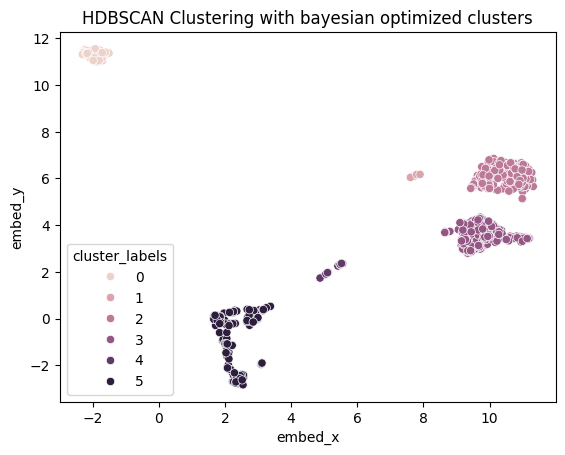

In [126]:
ax3 = sns.scatterplot(data=umap_embedding_df,
x="embed_x", y="embed_y", hue="cluster_labels")
ax3.set_title("HDBSCAN Clustering with bayesian optimized clusters")



Text(0.5, 1.0, 'HDBSCAN Clustering with ground truth labels')

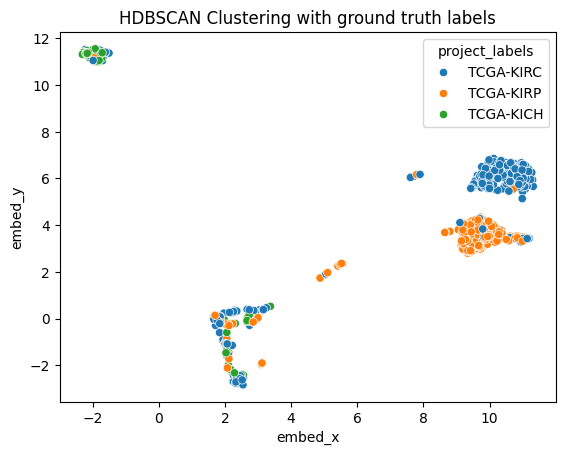

In [125]:
ax2 = sns.scatterplot(data = 
umap_embedding_df, x='embed_x', y='embed_y', hue='project_labels')
ax2.set_title("HDBSCAN Clustering with ground truth labels")

Text(0.5, 1.0, 'HDBSCAN Clustering with ground truth labels')

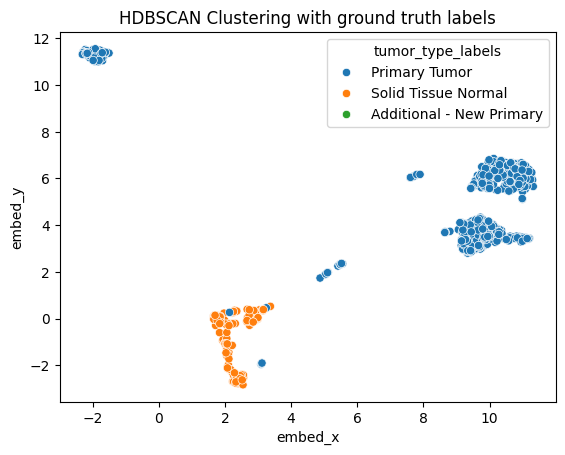

In [124]:
ax1 = sns.scatterplot(data = 
umap_embedding_df, x='embed_x', y='embed_y', hue='tumor_type_labels')
ax1.set_title("HDBSCAN Clustering with ground truth labels")


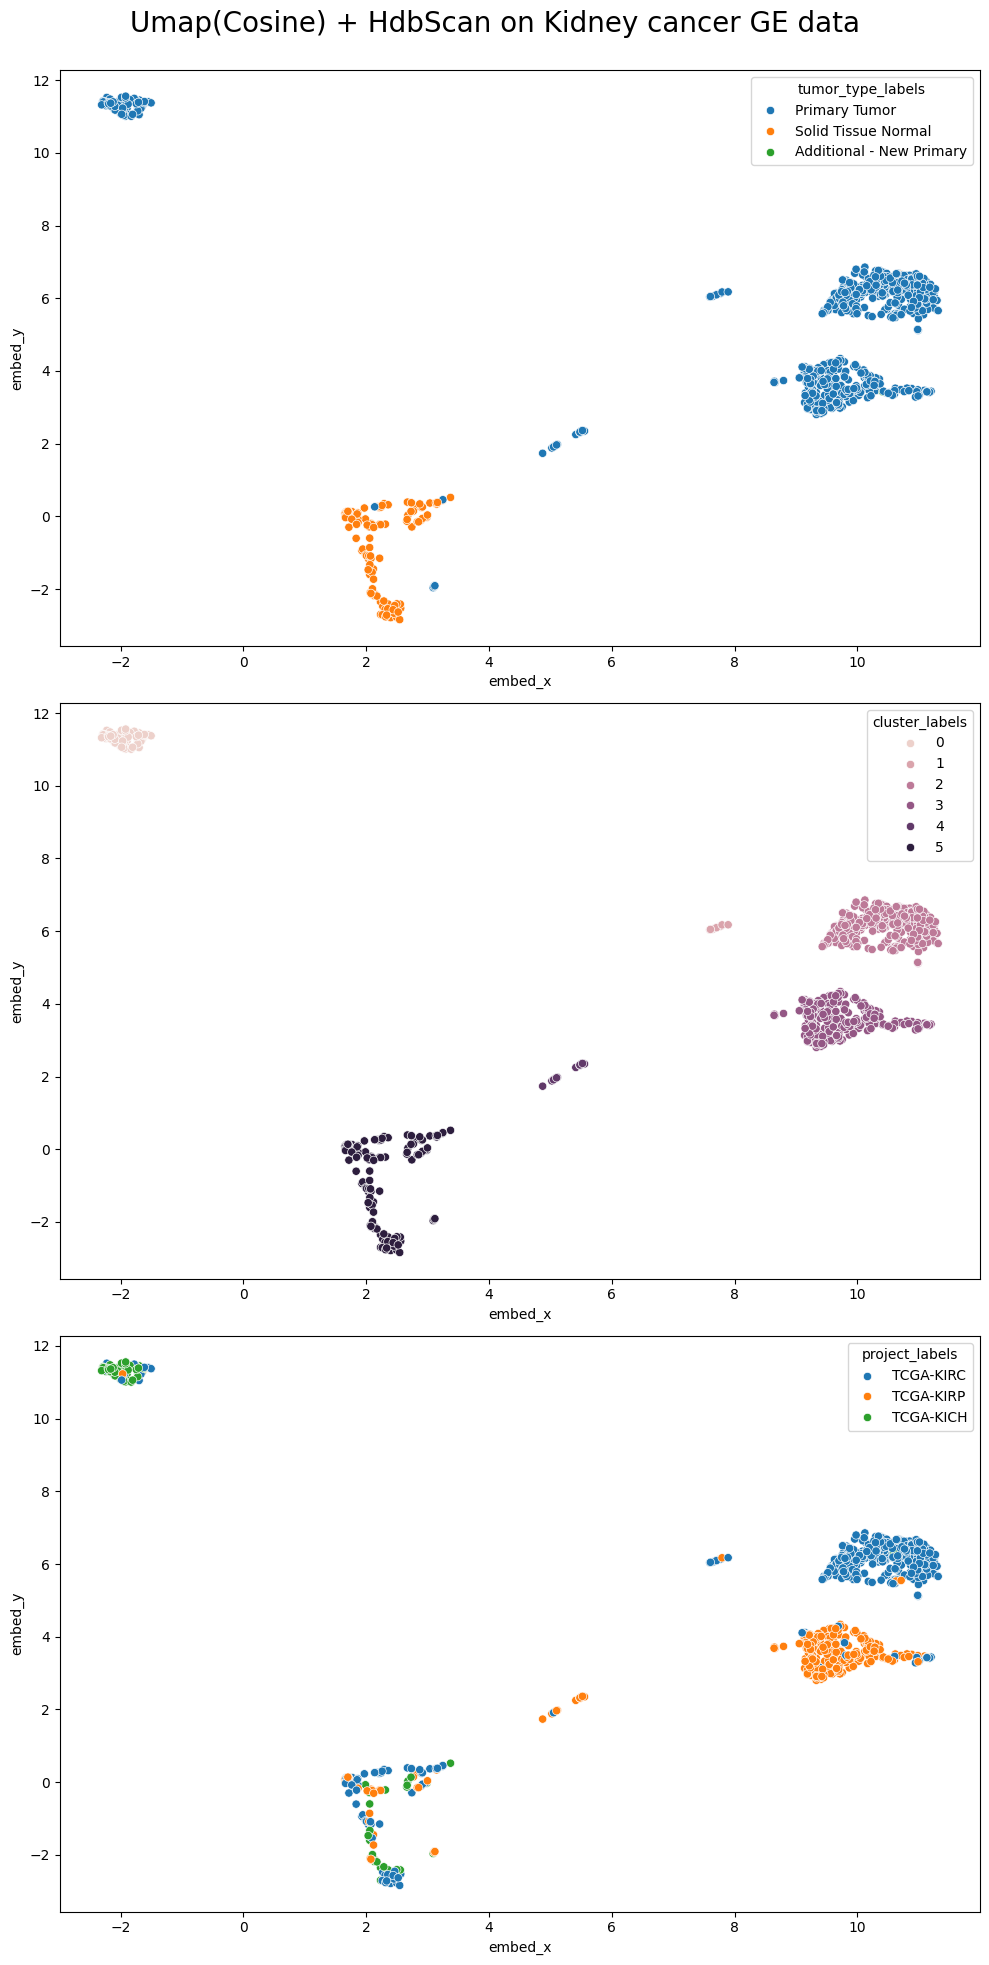

In [151]:
## combining plots
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(10, 20))
 


sns.scatterplot(ax=axes[0], data=umap_embedding_df, x='embed_x', y='embed_y', hue='tumor_type_labels')
sns.scatterplot(ax=axes[1], data=umap_embedding_df, x='embed_x', y='embed_y', hue='cluster_labels')
sns.scatterplot(ax=axes[2], data=umap_embedding_df, x='embed_x', y='embed_y', hue='project_labels')
fig.suptitle('Umap(Cosine) + HdbScan on Kidney cancer GE data', fontsize = 20)
fig = axes[0].get_figure()
fig.tight_layout()
fig.subplots_adjust(top=0.95)


## Identify why this clustering structure exists from metadata

1. Particularly clusters orange, blue, purple
2. Why is the big red cluster comprised of a mixed population of projects while there are 3 distinct clusters for each of the projects?
   1. Possibly since majority of them are Solid Tissue Normal, while Primary tumor types are segregated into their respective clusters
3. Which samples are deviantly being clustered into the wrong project_id groups and why ?
4. Which samples are deviantly clustered into the small cluster groups and why ?